<a href="https://colab.research.google.com/github/lucianocoelho-28/risco_de_credito/blob/main/Resolu%C3%A7%C3%A3o_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Luciano Coelho


e-mail: coelho.luciano@icloud.com

#RESUMO

Este notebook tem como objetivo fazer análise descritiva e tratamento dos dados de um dataset de clientes com maior probabilidade de default (risco de crédito)

##Indice



*   [Resumo](https://colab.research.google.com/drive/139pjm2Rl_nJLCSpuImhHtERFS2bBp0R0#scrollTo=KT5qLtCTtFsm&line=1&uniqifier=1)
*   [Indice](https://colab.research.google.com/drive/139pjm2Rl_nJLCSpuImhHtERFS2bBp0R0#scrollTo=3kWCyPVPtg55)
*   [Seção 01 - Importando Arquivos](https://colab.research.google.com/drive/139pjm2Rl_nJLCSpuImhHtERFS2bBp0R0#scrollTo=Se_o_01_Importando_Arquivos)
*   [Seção 02 - Tratamento dos Dados 1](https://)
*   [Seção 03 - Análise Exploratória e Tratamento dos Dados 2](https://)



#Seção 01 - Importando Arquivos

[Voltar ao Indice](https://)

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving risco_credito.csv to risco_credito (2).csv
User uploaded file "risco_credito.csv" with length 3482294 bytes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('risco_credito.csv')
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


In [5]:
def show_info(data):
  print('DATASET SHAPE: ', data.shape, '\n')
  print('-'*50)
  print('FEATURE DATA TYPES: ')
  print(data.info())
  print('\n', '-'*50)
  print('NUMBER OF UNIQUE VALUE PER FEATURE: ', '\n')
  print(data.nunique())
  print('\n', '-'*50)
  print('NULL VALUES PER FEATURE')
  print(data.isnull().sum())

show_info(df)


DATASET SHAPE:  (64592, 10) 

--------------------------------------------------
FEATURE DATA TYPES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   signo                       43825 non-null  object 
 7   genero                      57406 non-null  object 
 8   perfil_facebook             58185 non-null  object 
 9   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB
None

 ----------------------------------------------

#Seção 02 - Tratamento dos Dados 1

[Voltar ao Indice](https://)

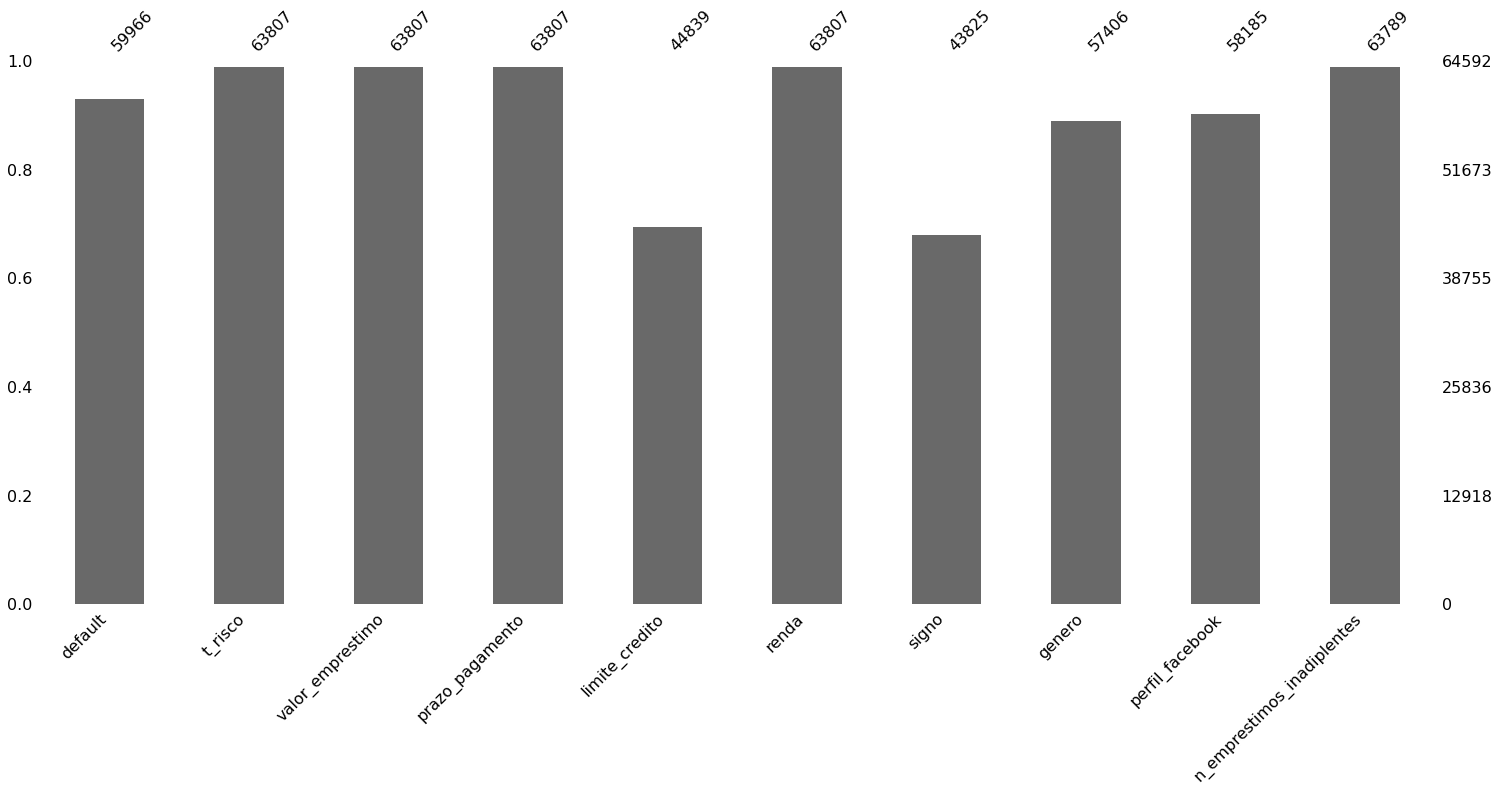

In [6]:
msno.bar(df)

1) Exclusão as linhas referentes a **default** que estão nulas

In [7]:
df = df.dropna(subset=['default'])

2) Pelo resumo das variáveis quantitativas, o ideal é substituir os valores faltantes do **limite de crédito** e do **número de empréstimos** com inadiplência pela mediana

In [8]:
df.describe()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,59966.000000,59966.000000,59966.000000,41187.000000,5.996600e+04,59948.000000
mean,0.294114,13411.805468,40.674649,34093.005997,7.132578e+04,0.004671
std,0.101183,7957.402823,9.504775,36783.480509,5.169143e+04,0.079059
min,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000
25%,0.220000,7225.987500,36.000000,9907.000000,4.402786e+04,0.000000
50%,0.290000,12012.400000,36.000000,25338.000000,6.004726e+04,0.000000
75%,0.360000,18036.645000,36.000000,46759.500000,8.503961e+04,0.000000
max,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,5.000000


In [9]:
valores_preenchimento = {'limite_credito': df['limite_credito'].median(), 'n_emprestimos_inadiplentes': df['n_emprestimos_inadiplentes'].median()}
df = df.fillna(value=valores_preenchimento)

3) Substituindo as qualitativas pela moda

In [10]:
df['genero'].value_counts()

m    38497
f    18473
Name: genero, dtype: int64

In [11]:
df['perfil_facebook'].value_counts()

False    33997
True     19998
Name: perfil_facebook, dtype: int64

In [12]:
df['signo'].value_counts()

libr     5582
virg     5571
cance    5541
leo      3507
gemi     3499
scor     3091
arie     3045
pisce    2992
capr     2958
aqua     2839
sagi     1402
taur     1001
Name: signo, dtype: int64

In [13]:
df['genero'] = df['genero'].fillna(df['genero'].mode()[0])
df['perfil_facebook'] = df['perfil_facebook'].fillna(df['perfil_facebook'].mode()[0])

In [14]:
df.isnull().sum()

default                           0
t_risco                           0
valor_emprestimo                  0
prazo_pagamento                   0
limite_credito                    0
renda                             0
signo                         18938
genero                            0
perfil_facebook                   0
n_emprestimos_inadiplentes        0
dtype: int64

#Seção 03 - Análise Exploratória e Tratamento dos Dados 2

[Voltar ao Indice](https://)

1) Variáveis Qualitativas

In [15]:
va_nominal = ['object', 'bool']
qualitativas = list(df.select_dtypes(include=va_nominal).columns)
qualitativas

['default', 'signo', 'genero', 'perfil_facebook']

In [16]:
df_quali = df[qualitativas]
df_quali.head()

,default,signo,genero,perfil_facebook
0,False,virg,f,True
1,False,sagi,f,False
2,False,libr,m,True
3,False,NaN,m,False
4,False,libr,m,False


default


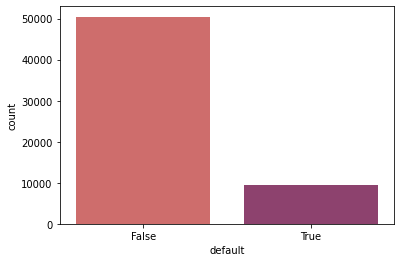

signo


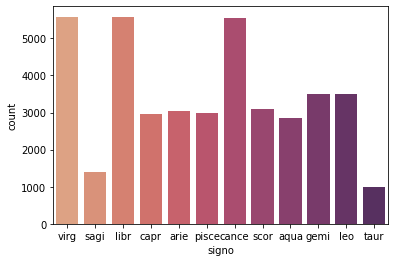

genero


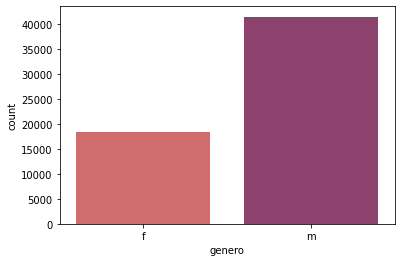

perfil_facebook


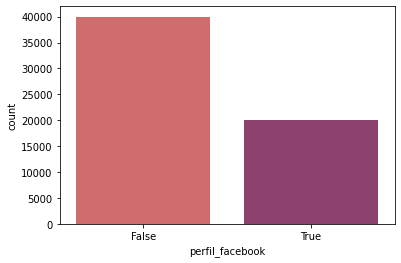

In [17]:
for va_nominal in df_quali:
  print(va_nominal)
  sns.countplot(df_quali[va_nominal],palette='flare')
  plt.show()

1.   A variável resposta (**Default**) possui classes desbalanceadas.
2.   **Signo**, as classes possuem contagens bem parecidas, só se destacando as contagens dos desconhecidos, que representa 31% dos dados, logo vou preferir apagar essa coluna do que perder informação dessas linhas.
3.   **Genero**, o desconhecido será substituído por masculino, pois possui uma frequência bem superior.
4.   **Perfil_facebook**, o desconhecido será substituído por falso.

In [18]:
df = df.drop(columns=['signo'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     59966 non-null  float64
 2   valor_emprestimo            59966 non-null  float64
 3   prazo_pagamento             59966 non-null  float64
 4   limite_credito              59966 non-null  float64
 5   renda                       59966 non-null  float64
 6   genero                      59966 non-null  object 
 7   perfil_facebook             59966 non-null  bool   
 8   n_emprestimos_inadiplentes  59966 non-null  float64
dtypes: bool(1), float64(6), object(2)
memory usage: 6.7+ MB


2) Variáveis Quantitativas


1.   A taxa de risco teve um pico em torno de 0.3.
2.   75% pediram empréstimo no valor de até 18.036,6.
3.   75% tem limite de crédito até 35125 e o valor máximo foi de 613117.
4.   75% tem renda até 8.500.
5.   75% não foram inadiplentes com empréstimos



In [20]:
df.describe()

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,59966.000000,59966.000000,59966.000000,59966.000000,5.996600e+04,59966.000000
mean,0.294114,13411.805468,40.674649,31351.281393,7.132578e+04,0.004669
std,0.101183,7957.402823,9.504775,30753.702302,5.169143e+04,0.079048
min,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000
25%,0.220000,7225.987500,36.000000,17316.500000,4.402786e+04,0.000000
50%,0.290000,12012.400000,36.000000,25338.000000,6.004726e+04,0.000000
75%,0.360000,18036.645000,36.000000,35125.000000,8.503961e+04,0.000000
max,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,5.000000


In [21]:
va_quantitativa = ['float64']
quantitativas = list(df.select_dtypes(include=va_quantitativa).columns)
quantitativas #tirar n_bankruptcies, n_defaulted_loans,

['t_risco',
 'valor_emprestimo',
 'prazo_pagamento',
 'limite_credito',
 'renda',
 'n_emprestimos_inadiplentes']

In [22]:
df_quanti = df[quantitativas]

t_risco


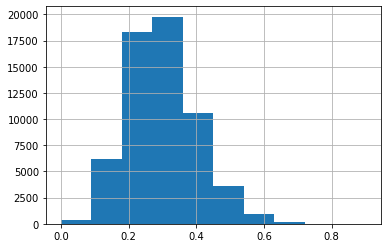

valor_emprestimo


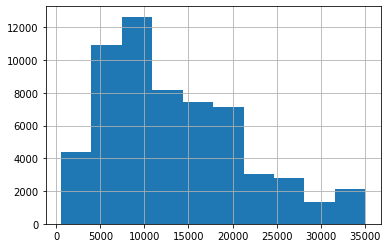

prazo_pagamento


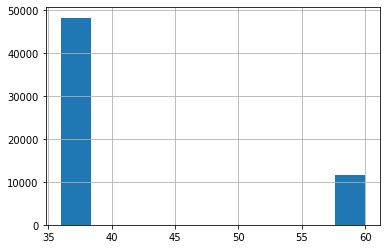

limite_credito


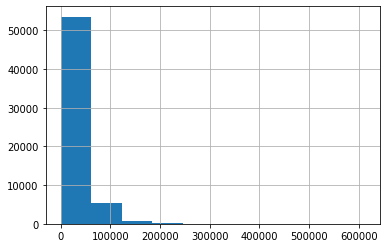

renda


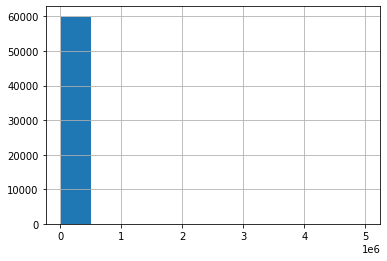

n_emprestimos_inadiplentes


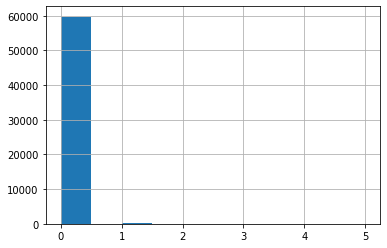

In [23]:
for va_quantitativa in df_quanti:
  print(va_quantitativa)
  df_quanti[va_quantitativa].hist(bins=10)
  plt.show()

3) Análise Bivariada

Parece que os clientes considerados com risco de não pagar o empréstimo, não há diferença entre o sexo e possuir ou não perfil no facebook

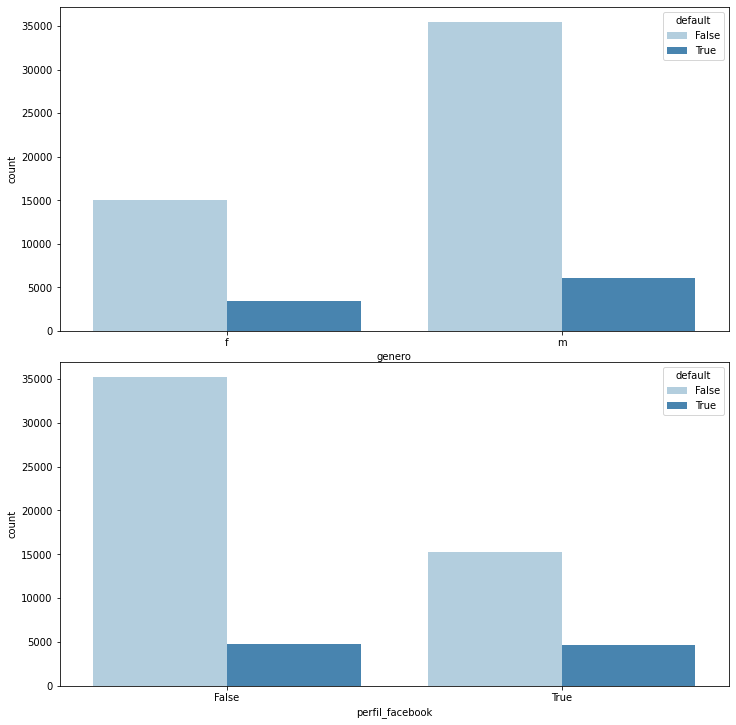

In [24]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
plt.tight_layout(1)

sns.countplot(df['genero'], hue=df.default, ax=ax[0], palette='Blues')
sns.countplot(df['perfil_facebook'], hue=df.default, ax=ax[1], palette='Blues')

t_risco


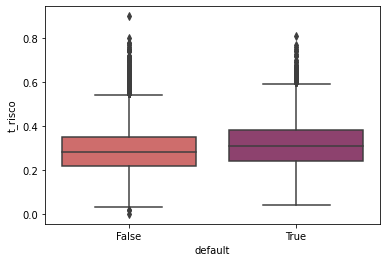

valor_emprestimo


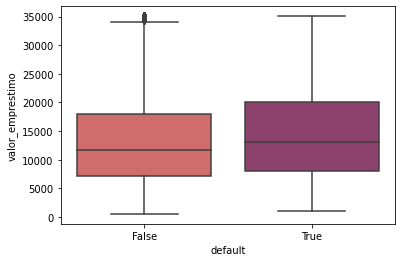

prazo_pagamento


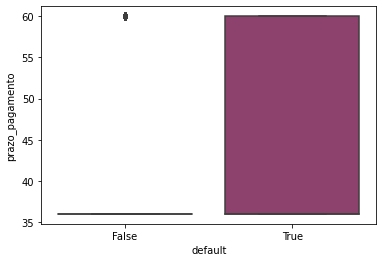

limite_credito


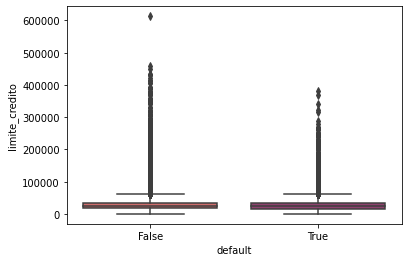

renda


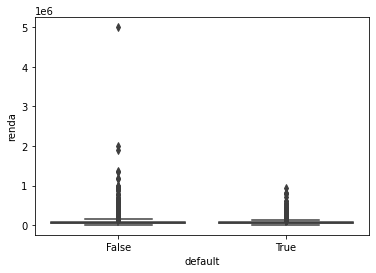

n_emprestimos_inadiplentes


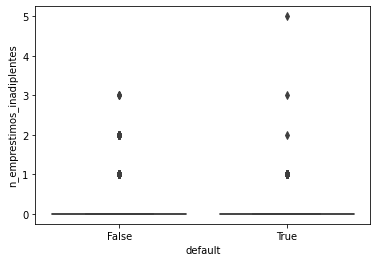

In [25]:
for va_quantitativa in df_quanti:
  print(va_quantitativa)
  sns.boxplot(y=df_quanti[va_quantitativa], x='default', data=df, palette='flare')
  plt.show()

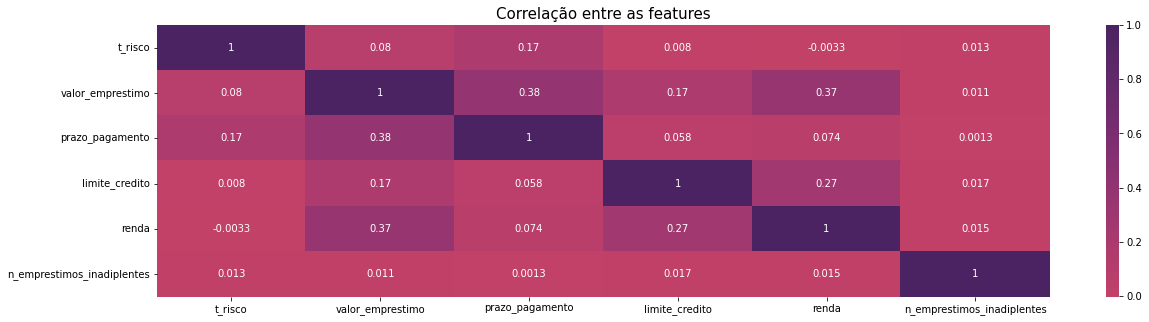

In [26]:
plt.figure(figsize=(20,5))
plt.title('Correlação entre as features', size=15)
sns.heatmap(df_quanti.corr(), cmap='flare', center=0, annot=True)

<Figure size 1080x504 with 0 Axes>

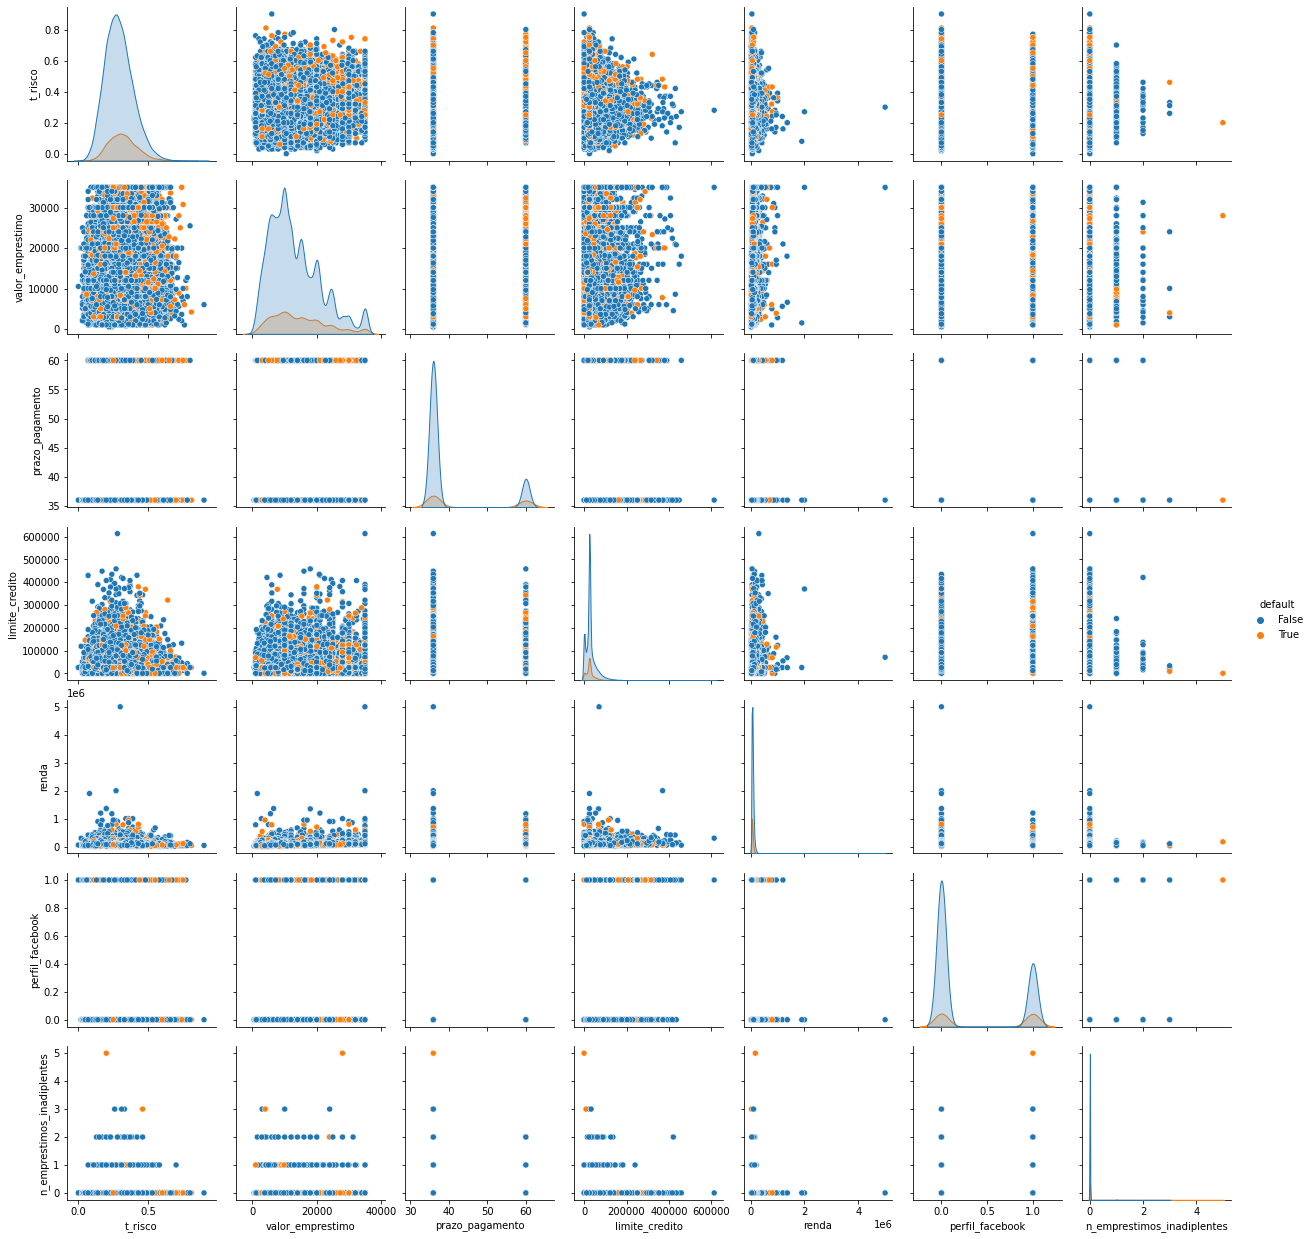

In [27]:
plt.figure(figsize=(15,7))
sns.pairplot(data=df, hue='default')

In [28]:
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,True,0.0
1,False,0.23,10046.51,36.0,25338.0,46016.31,f,False,0.0
2,False,0.30,21228.25,60.0,25338.0,48025.47,m,True,0.0
3,False,0.15,23032.33,36.0,25338.0,46011.12,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,False,0.0


4) Transformando em variáveis binárias

In [29]:
df = pd.get_dummies(df, columns=['prazo_pagamento','genero','perfil_facebook','default'], drop_first=True)

In [30]:
df.head()

,t_risco,valor_emprestimo,limite_credito,renda,n_emprestimos_inadiplentes,prazo_pagamento_60.0,genero_m,perfil_facebook_True,default_True
0,0.43,20024.31,62386.0,59869.05,0.0,1,0,1,0
1,0.23,10046.51,25338.0,46016.31,0.0,0,0,0,0
2,0.30,21228.25,25338.0,48025.47,0.0,1,1,1,0
3,0.15,23032.33,25338.0,46011.12,0.0,0,1,0,0
4,0.08,24026.29,32366.0,90026.17,0.0,0,1,0,0


5) Substituindo outlier por quantil

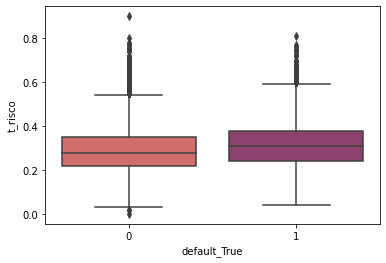

In [31]:
sns.boxplot(data=df, x="default_True", y="t_risco", palette='flare')

In [32]:
out_max = df['t_risco'].quantile(0.975)
out_max

0.51

In [33]:
df.loc[df['t_risco'] > out_max, 't_risco'] = out_max

In [34]:
out_min = df['t_risco'].quantile(0.025)
out_min

0.12

In [35]:
df.loc[df['t_risco'] < out_min, 't_risco'] = out_min

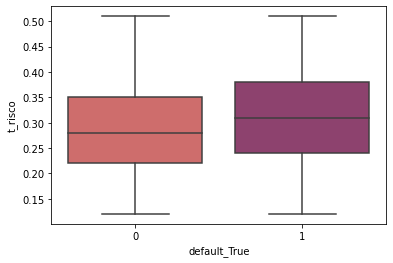

In [36]:
sns.boxplot(data=df, x="default_True", y="t_risco", palette='flare')